# Load Dependencies

In [1]:
#%matplotlib notebook
%matplotlib inline

#dependencies and setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Files to Load

In [2]:
#Files to Load
cleaned_poverty_df = 'Cleaned_Data/cleaned_poverty_df.csv'
cleaned_unemployment_df = 'Cleaned_Data/cleaned_unemployment_df.csv'
cleaned_unemployment_rate_df = 'Cleaned_Data/cleaned_unemployment_rate_df.csv'
crime_df = 'Cleaned_Data/crime_df.csv'
crime_police_merged = 'Cleaned_Data/crime_police_merged.csv'
police_count_2014_2017_df = 'Cleaned_Data/police_count_2014_2017_df.csv'
police_df = 'Cleaned_Data/police_df.csv'
cleaned_ny_unemployment_rate = 'Cleaned_Data/cleaned_ny_unemployment_rate.csv'
cleaned_ohio_unemployment_rate = 'Cleaned_Data/cleaned_ohio_unemployment_rate.csv'

#Files to Read
cleaned_poverty_df = pd.read_csv(cleaned_poverty_df)
cleaned_unemployment_df = pd.read_csv(cleaned_unemployment_df)
cleaned_unemployment_rate_df = pd.read_csv(cleaned_unemployment_rate_df)
crime_df = pd.read_csv(crime_df)
crime_police_merged = pd.read_csv(crime_police_merged)
police_count_2014_2017_df = pd.read_csv(police_count_2014_2017_df)
police_df = pd.read_csv(police_df)
cleaned_ny_unemployment_rate = pd.read_csv(cleaned_ny_unemployment_rate)
cleaned_ohio_unemployment_rate = pd.read_csv(cleaned_ohio_unemployment_rate)


/Users/parinmody/Desktop/anaconda3/envs/PythonData/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Crime Rate in Major Cities (LA, NYC, Columbus)

In [3]:
#create new dataframe with information needed from existing dataframe
major_cities = pd.DataFrame(crime_df, columns = ['Agency Name', 'Offense Categories'])

#set index to the city name in order to filter out multiple cities at once
major_cities.set_index("Agency Name", inplace=True)

#filter out cities to only extract the ones needed
major_cities = major_cities.loc[["Los Angeles", "New York", "Columbus"]] 

#reset the index
major_cities = major_cities.reset_index()

In [4]:
#ASSAULT:
#only filter out assault crimes and groupby filtered cities
assault =  major_cities.loc[major_cities["Offense Categories"] == "Assault"]

assault_1 = assault.groupby(["Agency Name"])

#count number of assault offenses in filtered cities
assault_total = assault_1.count()

#rename column to easily extract information for stacked bar chart
assault_total = assault_total.rename(columns={'Offense Categories': "Assault"})

#reset index 
assault_total = assault_total.reset_index()

In [5]:
#BURGLARY:
#only filter out burglary crimes and groupby filtered cities
burglary =  major_cities.loc[major_cities["Offense Categories"] == "Burglary/Breaking & Entering"]

burglary_1 = burglary.groupby(["Agency Name"])

#count number of assault offenses in filtered cities
burglary_total = burglary_1.count()

#rename column to easily extract information for stacked bar chart
burglary_total = burglary_total.rename(columns={'Offense Categories': "Burglary"})

#reset index 
burglary_total = burglary_total.reset_index()

In [6]:
#DESTRUCTION: 
#only filter out destruction crimes and groupby filtered cities
destruction =  major_cities.loc[major_cities["Offense Categories"] == "Destruction/Damage/Vandalism of Property"]

destruction_1 = destruction.groupby(["Agency Name"])

#count number of assault offenses in filtered cities
destruction_total = destruction_1.count()

#rename column to easily extract information for stacked bar chart
destruction_total = destruction_total.rename(columns={'Offense Categories': "Destruction"})

#reset index 
destruction_total = destruction_total.reset_index()

In [7]:
#ROBBERY:
#only filter out robbery crimes and groupby filtered cities
robbery =  major_cities.loc[major_cities["Offense Categories"] == "Robbery"]

robbery_1 = robbery.groupby(["Agency Name"])

#count number of assault offenses in filtered cities
robbery_total = robbery_1.count()

#rename column to easily extract information for stacked bar chart
robbery_total = robbery_total.rename(columns={'Offense Categories': "Robbery"})

#reset index 
robbery_total = robbery_total.reset_index()

In [8]:
#INTIMIDATION:
#only filter out intimidation crimes and groupby filtered cities
intimidation =  major_cities.loc[major_cities["Offense Categories"] == "Intimidation"]

intimidation_1 = intimidation.groupby(["Agency Name"])

#count number of assault offenses in filtered cities
intimidation_total = intimidation_1.count()

#rename column to easily extract information for stacked bar chart
intimidation_total = intimidation_total.rename(columns={'Offense Categories': "Intimidation"})

#reset index
intimidation_total = intimidation_total.reset_index()

# Stacked Bar Chart

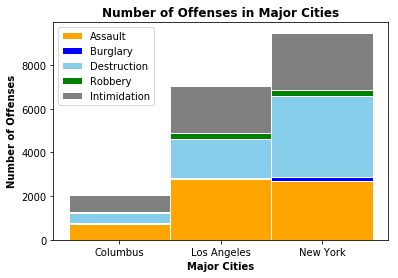

In [11]:
#CREATE STACKED BAR CHART

#extract specific information for each bar
bar1 = assault_total["Assault"]
bar2 = burglary_total["Burglary"]
bar3= destruction_total["Destruction"]
bar4 = robbery_total["Robbery"]
bar5 = intimidation_total["Intimidation"]

#the position of the bars on the x-axis
r = [0,1,2]
 
#names of group and bar width
names = ['Columbus', 'Los Angeles', 'New York']
barWidth = 1
 
#create bar 1
plt.bar(r, bar1, color ='orange', edgecolor='white', width=barWidth, label="Assault")
#create bar 2
plt.bar(r, bar2, bottom=bar1, color='blue', edgecolor='white', width=barWidth, label="Burglary")
#create bar 3
plt.bar(r, bar3, color='skyblue', bottom=bar1+bar2, edgecolor='white', width=barWidth, label="Destruction")
#create bar 4
plt.bar(r, bar4, color='green', bottom=bar1+bar2+bar3, edgecolor='white', width=barWidth, label="Robbery")
#create bar 5
plt.bar(r, bar5, color='gray', bottom=bar1+bar2+bar3+bar4, edgecolor='white', width=barWidth, label="Intimidation")
 
#name the ticks on x-axis
plt.xticks(r, names)

#label the graph
plt.xlabel("Major Cities", fontweight='bold')
plt.ylabel("Number of Offenses", fontweight='bold')
plt.title ("Number of Offenses in Major Cities", fontweight='bold')

#plot the legend in best location
plt.legend(loc="best")

#save figure
plt.savefig("Images/Offenses_Major_Cities.png")

#show graph
plt.show()